### Abalone Data Set
Link to download the data set: 
https://www.kaggle.com/rodolfomendes/abalone-dataset

#### Description of the data set:  
"Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.  "

#### Attribute Information 
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem. 

Name / Data Type / Measurement Unit / Description 
----------------------------- 
Sex / nominal / -- / M, F, and I (infant) 
Length / continuous / mm / Longest shell measurement 
Diameter	/ continuous / mm / perpendicular to length 
Height / continuous / mm / with meat in shell 
Whole weight / continuous / grams / whole abalone 
Shucked weight / continuous	/ grams / weight of meat 
Viscera weight / continuous / grams / gut weight (after bleeding) 
Shell weight / continuous / grams / after being dried 
Rings / integer / -- / +1.5 gives the age in years 

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("abalone.csv")

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
df.describe() 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


There appears to be some Height = 0 in the data.  Remove them, since it does not make much sense

In [12]:
df = df[df.Height != 0] # removing rows with 0 height.
df.describe() 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


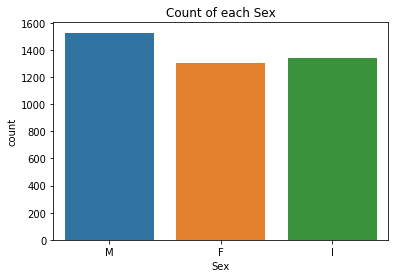

Sex
F    1307
I    1340
M    1528
dtype: int64


In [17]:
# Count of each sex
sns.countplot(df["Sex"], label = "count") 
plt.title("Count of each Sex")
plt.show()
print(df.groupby("Sex").size())

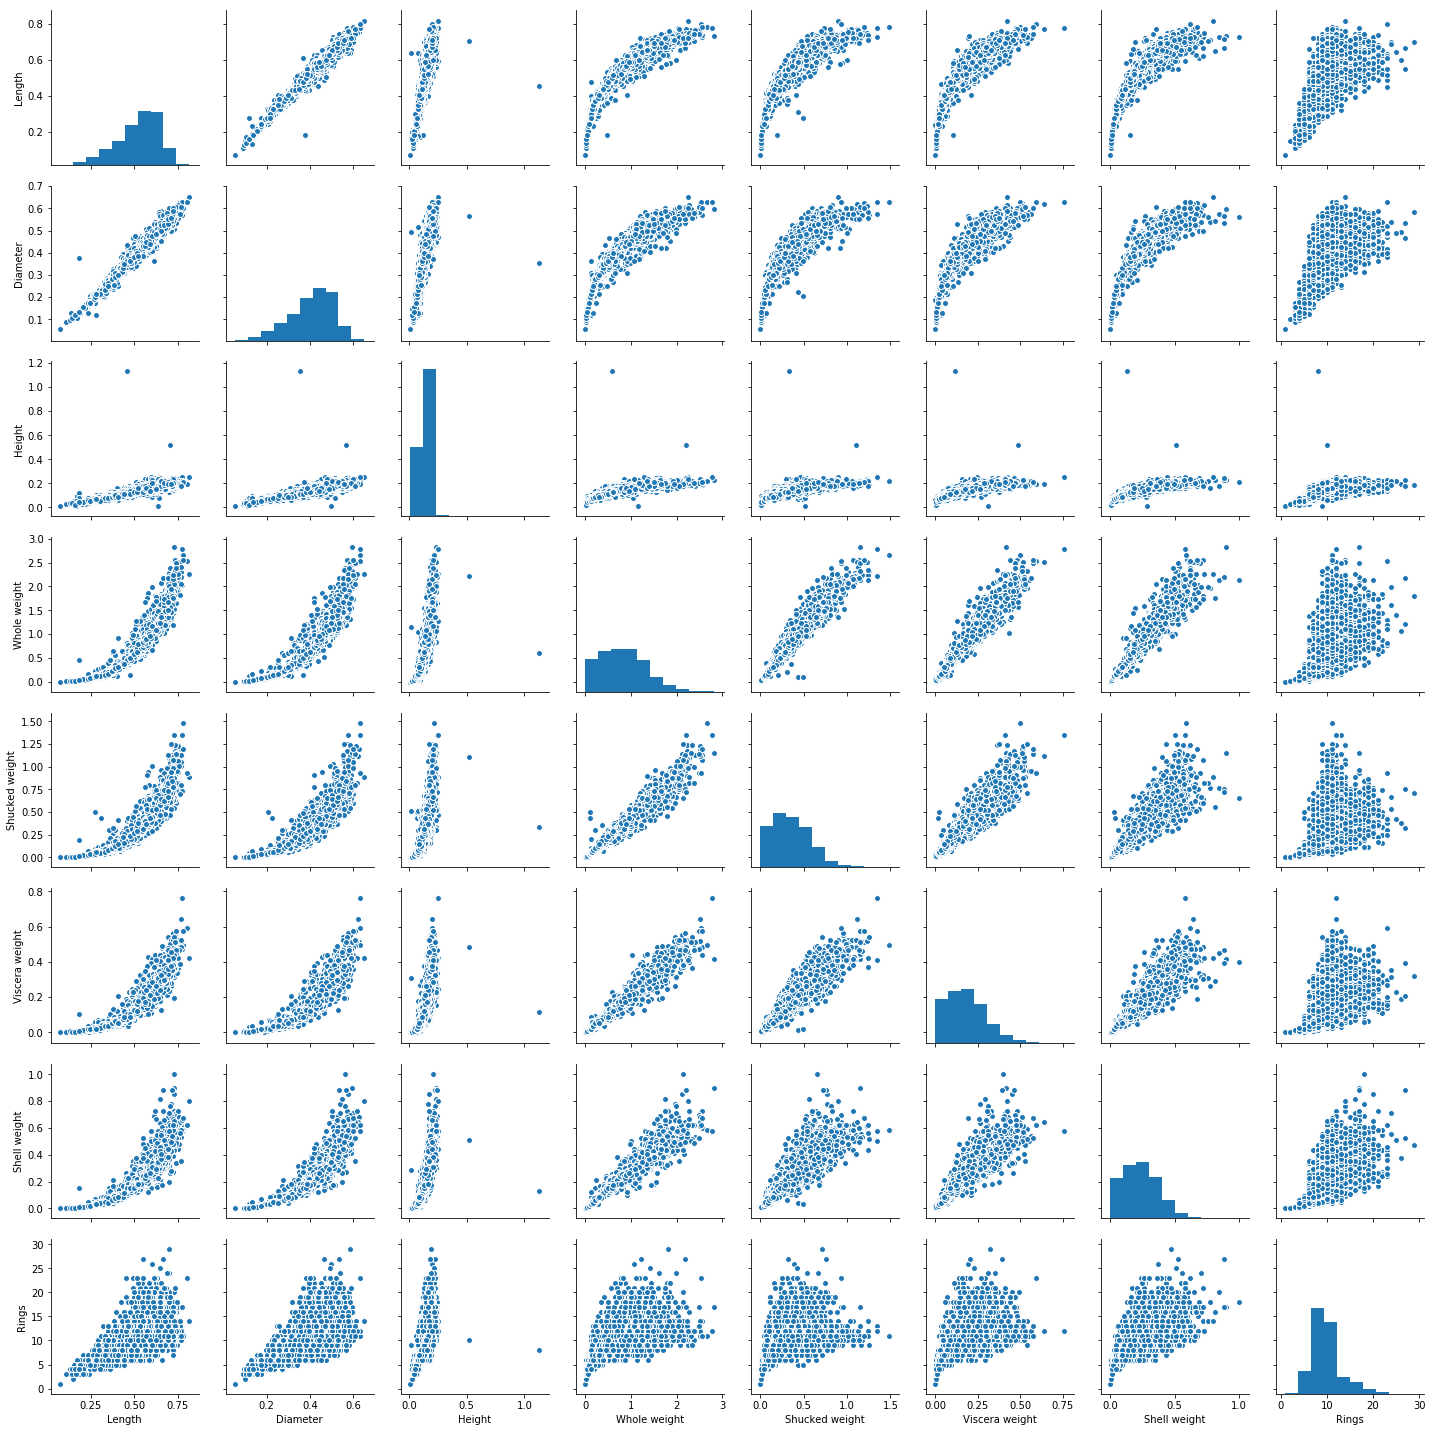

In [30]:
new_col = pd.get_dummies(df.Sex)
df[new_col.columns] = new_col
df.columns
sns.pairplot(df.drop(['F','I', 'M'], axis=1))
#sns.pairplot(df), this gives you the sex which isn't useful

In [7]:
attributes = ["Length", "Diameter", "Height", "Rings", "Whole weight"]
print(df[attributes].corr())
df[["Length", "Diameter", "Height", "Rings", "Whole weight","Viscera weight", "Shucked weight", "Shell weight"]].corr()

                Length  Diameter    Height     Rings  Whole weight
Length        1.000000  0.986812  0.827554  0.556720      0.925261
Diameter      0.986812  1.000000  0.833684  0.574660      0.925452
Height        0.827554  0.833684  1.000000  0.557467      0.819221
Rings         0.556720  0.574660  0.557467  1.000000      0.540390
Whole weight  0.925261  0.925452  0.819221  0.540390      1.000000


,Length,Diameter,Height,Rings,Whole weight,Viscera weight,Shucked weight,Shell weight
Length,1.000000,0.986812,0.827554,0.556720,0.925261,0.903018,0.897914,0.897706
Diameter,0.986812,1.000000,0.833684,0.574660,0.925452,0.899724,0.893162,0.905330
Height,0.827554,0.833684,1.000000,0.557467,0.819221,0.798319,0.774972,0.817338
Rings,0.556720,0.574660,0.557467,1.000000,0.540390,0.503819,0.420884,0.627574
Whole weight,0.925261,0.925452,0.819221,0.540390,1.000000,0.966375,0.969405,0.955355
Viscera weight,0.903018,0.899724,0.798319,0.503819,0.966375,1.000000,0.931961,0.907656
Shucked weight,0.897914,0.893162,0.774972,0.420884,0.969405,0.931961,1.000000,0.882617
Shell weight,0.897706,0.905330,0.817338,0.627574,0.955355,0.907656,0.882617,1.000000


There is a strong association between 'Weight', 'Diameter', and 'Length'

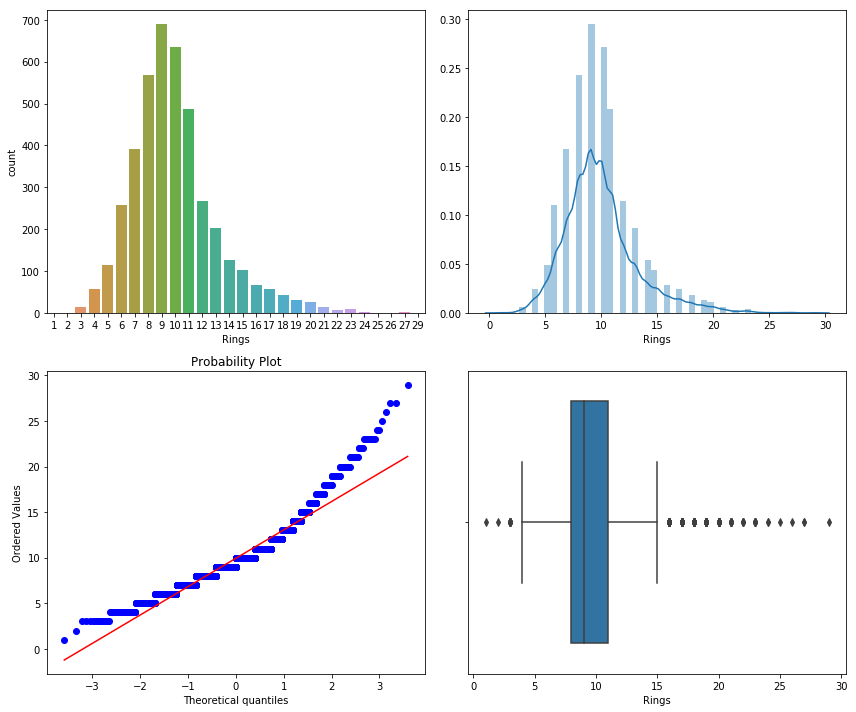

In [36]:
from scipy import stats
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.countplot(df["Rings"])

plt.subplot(2,2,2)
sns.distplot(df["Rings"])

plt.subplot(2,2,3)
stats.probplot(df["Rings"], plot=plt)

plt.subplot(2,2,4)
sns.boxplot(df["Rings"]) 

plt.tight_layout()

It seems that the label value is skewed after 15 years of age

In [40]:
# Based on the data, it may be good for predicting the Rings between 3 to 15 years

new_df = df[df.Rings < 16]
new_df = new_df[new_df.Rings > 2]
new_df = new_df[new_df.Height < 0.4]

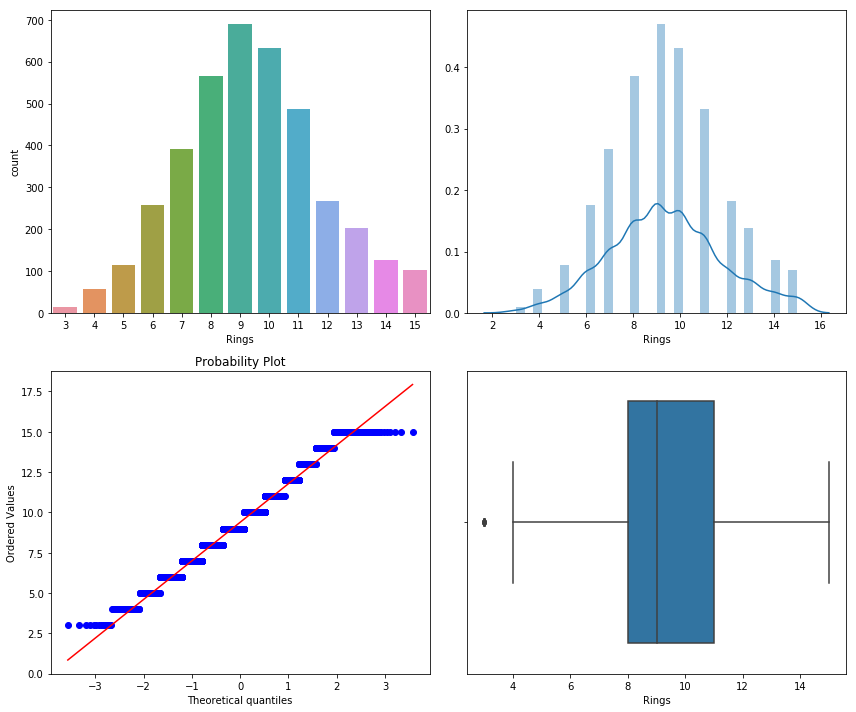

In [41]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.countplot(new_df["Rings"])

plt.subplot(2,2,2)
sns.distplot(new_df["Rings"])

plt.subplot(2,2,3)
stats.probplot(new_df["Rings"], plot=plt)

plt.subplot(2,2,4)
sns.boxplot(new_df["Rings"])

plt.tight_layout()

In [47]:
from sklearn.preprocessing import StandardScaler
convert = StandardScaler()

feature = new_df.drop(["Sex", "Rings"], axis = 1)
label = new_df.Rings

feature = convert.fit_transform(feature)

In [48]:
from sklearn.model_selection import train_test_split
f_train, f_test, l_train, l_test = train_test_split(feature, label, random_state = 23, test_size = 0.2)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=23)
model.fit(f_train, l_train)
y_predict = model.predict(f_train)
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
accuracy_score(l_train, y_predict)

0.2803708439897698